# Grids
Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# PairGrid
Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

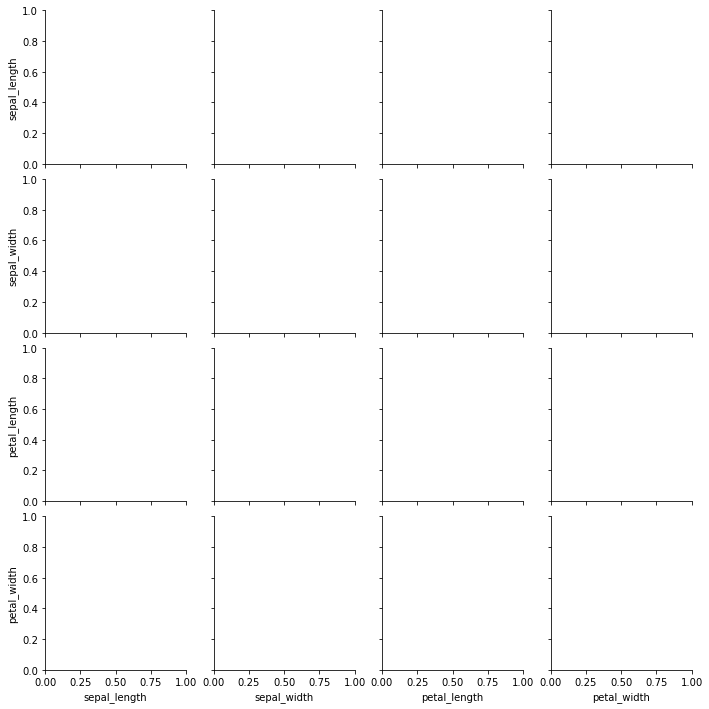

In [5]:
# Just the Grid
sns.PairGrid(iris)

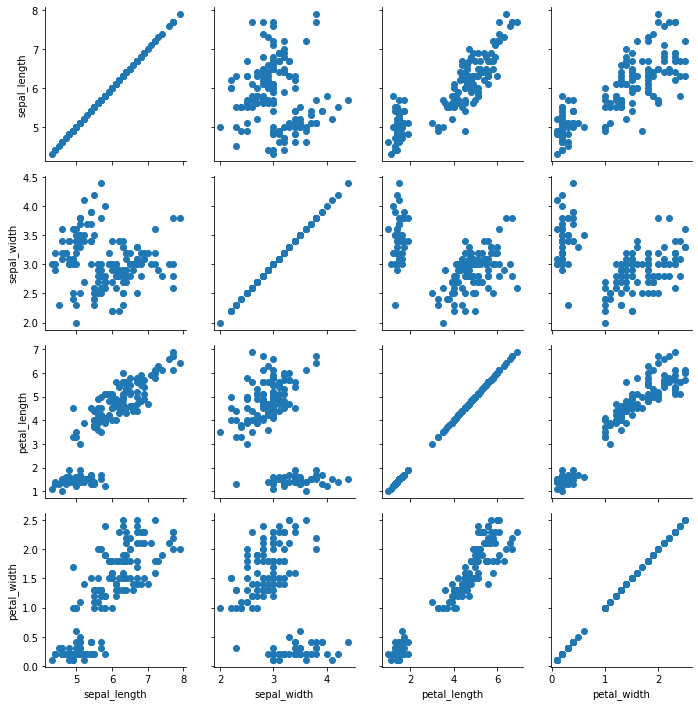

In [6]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

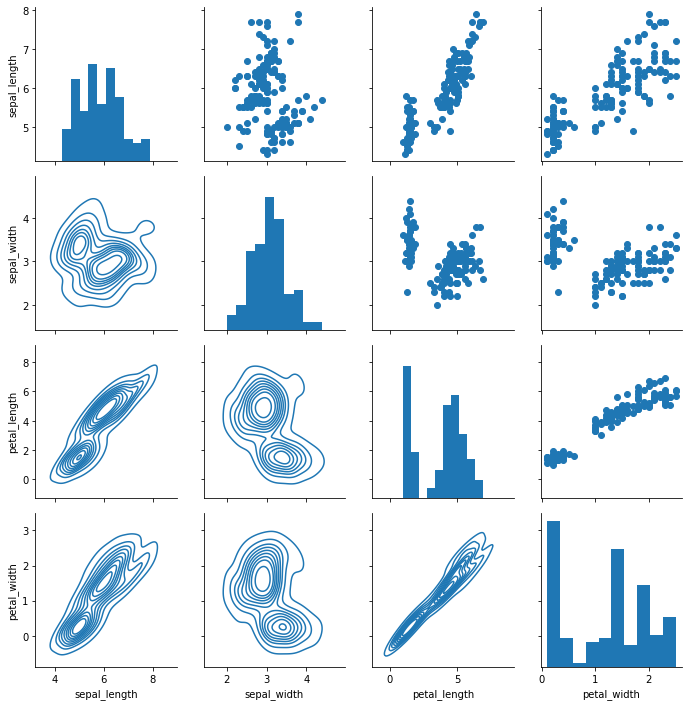

In [7]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# pairplot
pairplot is a simpler version of PairGrid (you'll use quite often)

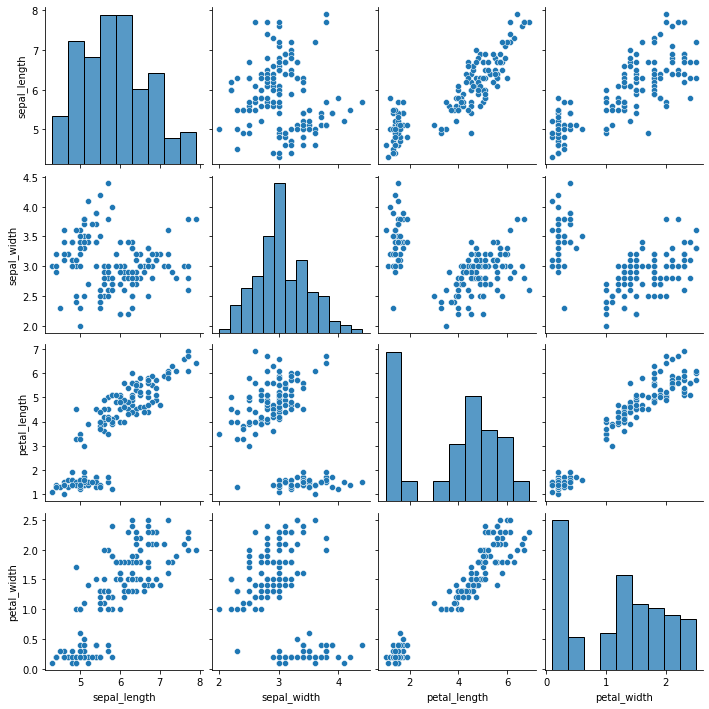

In [8]:
sns.pairplot(iris)

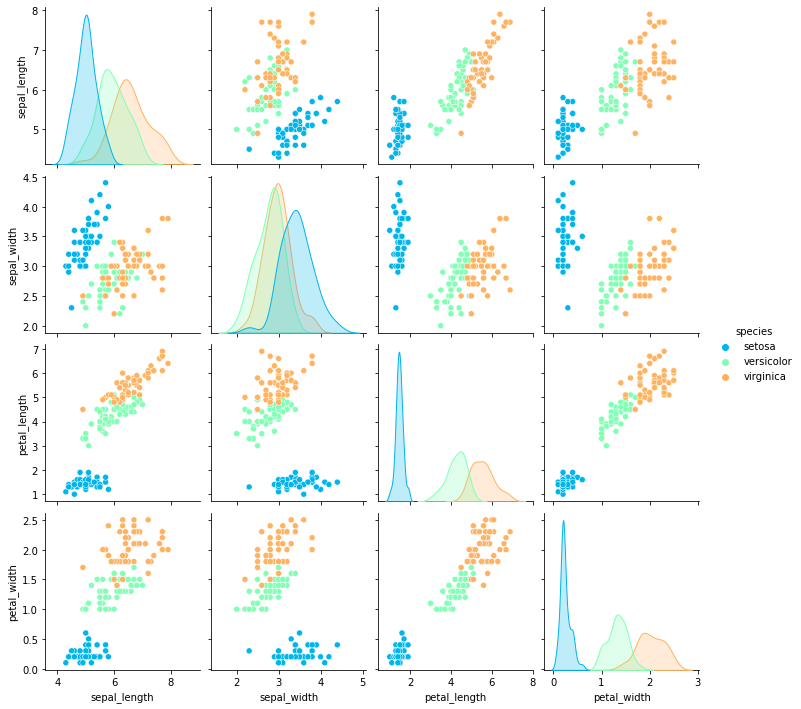

In [9]:
sns.pairplot(iris,hue='species',palette='rainbow')

# Facet Grid
FacetGrid is the general way to create grids of plots based off of a feature:

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


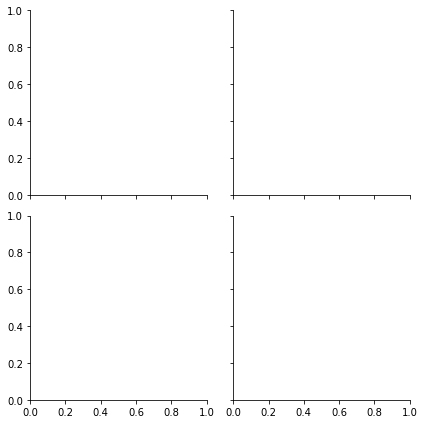

In [12]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

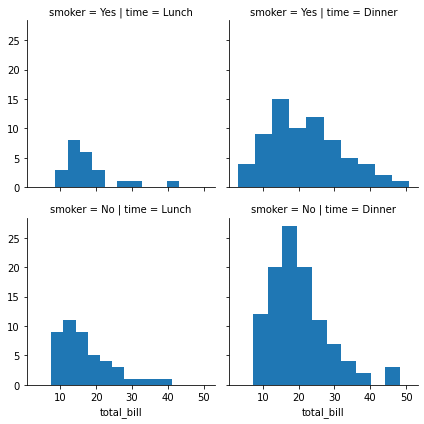

In [13]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

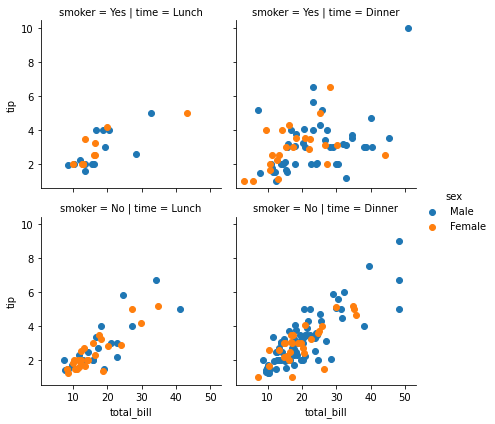

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Regression Plots
Seaborn has many built-in capabilities for regression plots.

lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# lmplot()

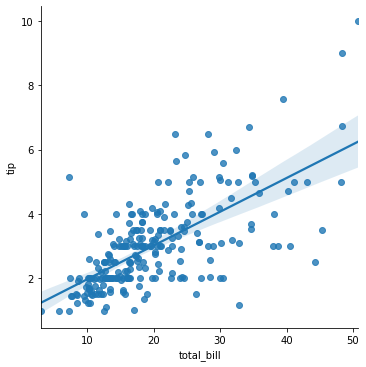

In [18]:
sns.lmplot(x='total_bill',y='tip',data=tips)

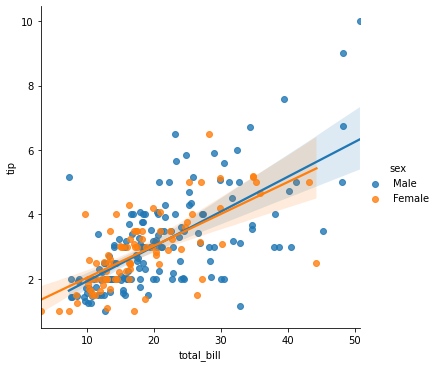

In [19]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

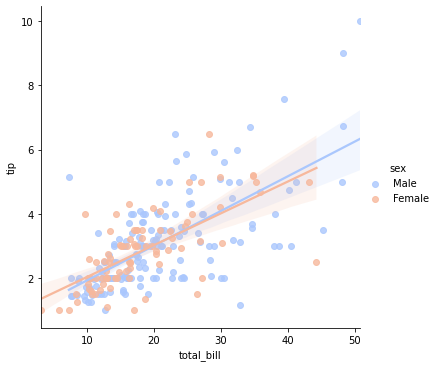

In [20]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

# Working with Markers
lmplot kwargs get passed through to regplot which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

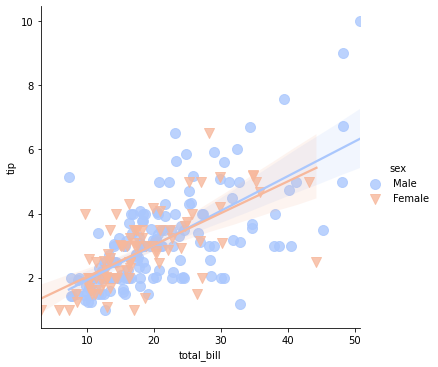

In [21]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

# Using a Grid
We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

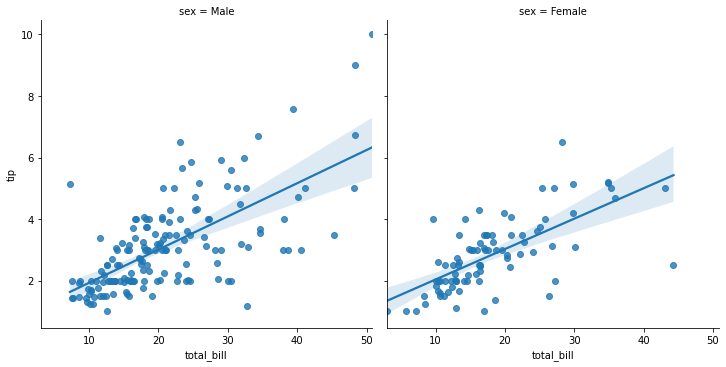

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

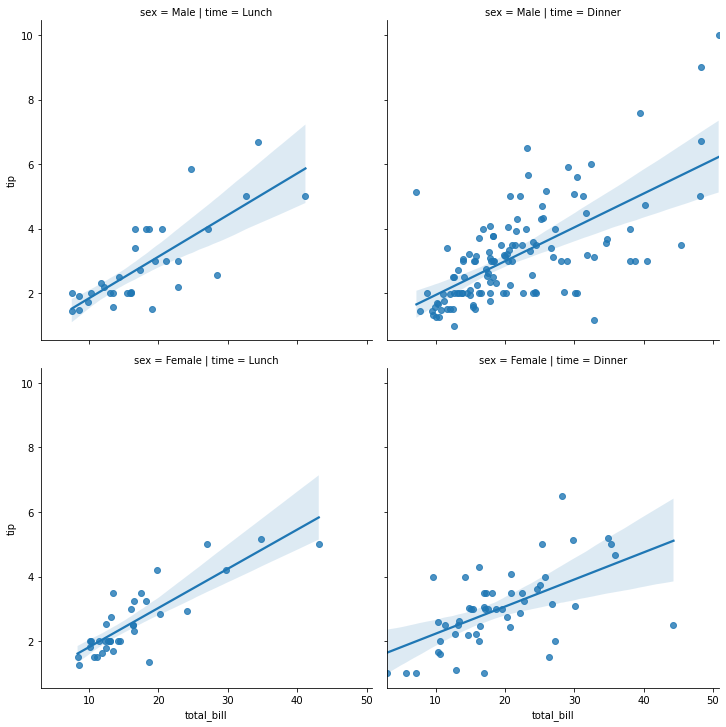

In [23]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

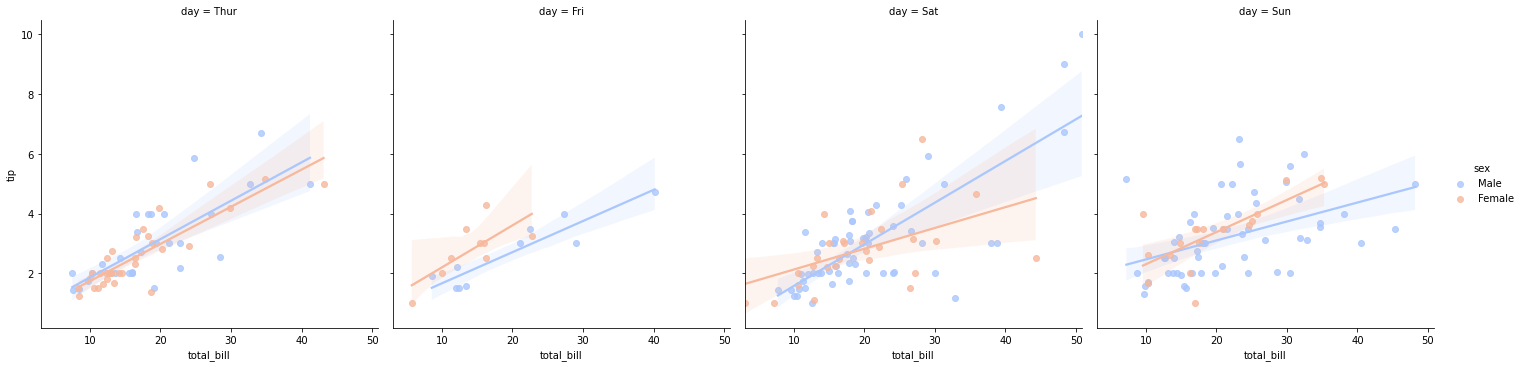

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

# Aspect and Size
Seaborn figures can have their size and aspect ratio adjusted with the size and aspect parameters:

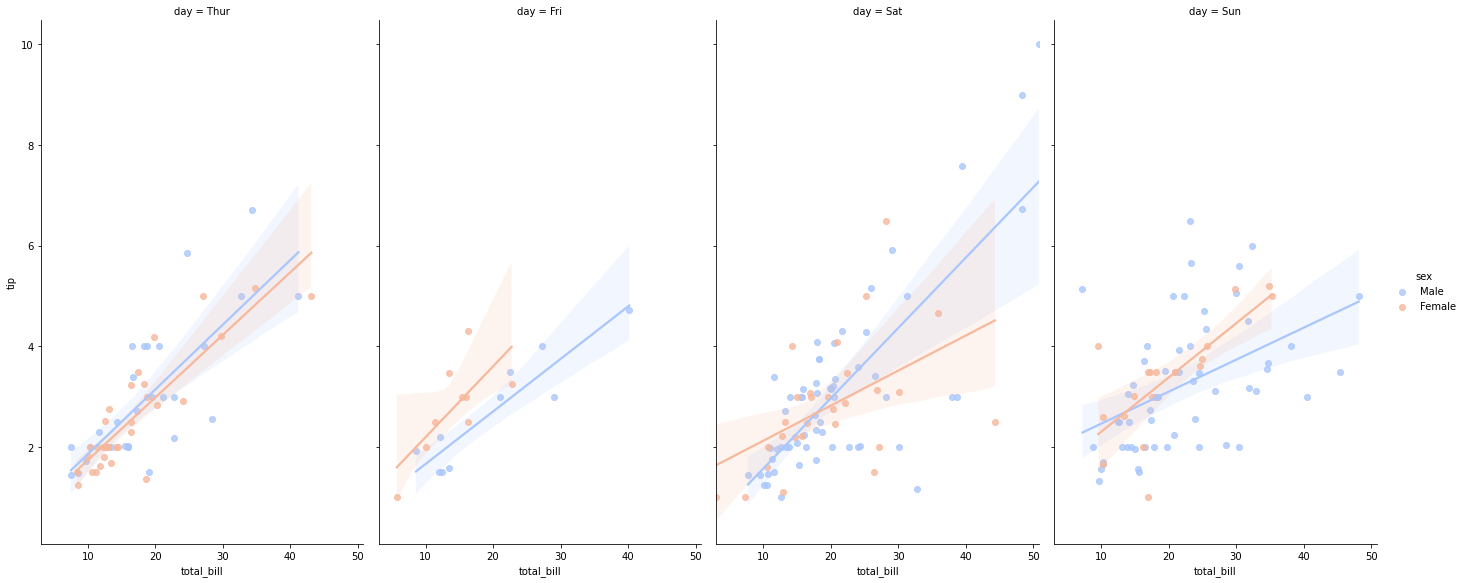

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8)